C:\Users\ARYAN PARIKH\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package punkt to C:\Users\ARYAN
[nltk_data]     PARIKH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ARYAN
[nltk_data]     PARIKH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
Accuracy: 0.9766816143497757
Confusion Matrix:
[[955  10]
 [ 16 134]]
Classification Report:
            

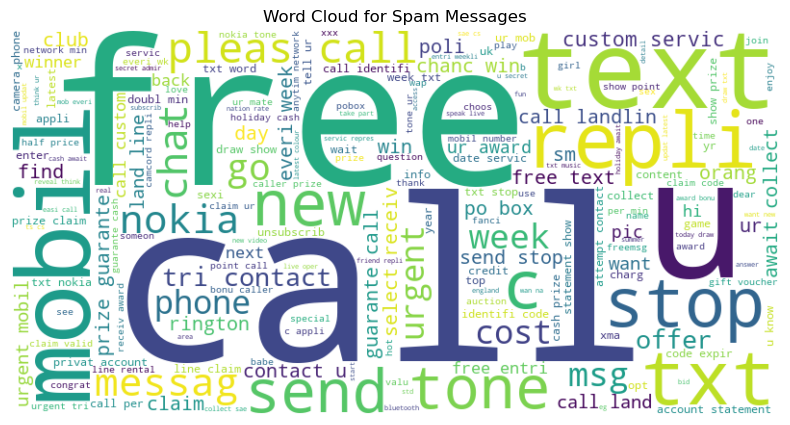

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk import download
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK resources
download('punkt')
download('stopwords')

# Load the dataset
dataset_path = "C:\\Users\\ARYAN PARIKH\\Desktop\\Oasis Internship\\archive (3)\\spam.csv"
spam_data = pd.read_csv(dataset_path, encoding='latin-1')

# Display the first few rows of the dataset
print(spam_data.head())

# Drop unnecessary columns and rename columns for better understanding
spam_data = spam_data[['v1', 'v2']]
spam_data.columns = ['label', 'message']

# Explore the dataset
print(spam_data.info())

# Preprocess the text data
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(token.lower()) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return ' '.join(tokens)

spam_data['processed_message'] = spam_data['message'].apply(preprocess_text)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    spam_data['processed_message'], spam_data['label'], test_size=0.2, random_state=42
)

# Build a pipeline for text classification using Naive Bayes
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Visualize a Word Cloud for spam messages
spam_words = ' '.join(spam_data[spam_data['label'] == 'spam']['processed_message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()
